<a href="https://colab.research.google.com/github/notriki/praktikum/blob/main/Image_Processing_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction to Image Processing in Python**
>Praktikum ini memberikan pengenalan teknik pemrosesan gambar dasar menggunakan library computer vision OpenCV dan beberapa library analisis data standar dengan Python. Pengetahuan tentang pemrosesan gambar dan pemrograman Python tidak diperlukan untuk workshop ini, tetapi akan membantu Anda untuk memahami apa yang Anda kerjakan.

*The source of this notebook is located at https://github.com/xn2333/OpenCV/blob/master/Seminar_Image_Processing_in_Python.ipynb*

*Useful intro about [Colab](https://colab.research.google.com/notebooks/welcome.ipynb)*

*Useful intro about [OpenCV](https://opencv.org/)*








##Step1: Load the Dependencies

> Anda akan memanggil beberapa libraries yang akan digunakan selama praktikum ini: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.









In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

##Step2: Read Image from Urls

> Pada langkah ini kita akan membaca gambar dari url, dan menampilkannya menggunakan openCV, perhatikan perbedaannya saat membaca gambar dalam format RGB dan BGR. Channel warna input default pada library openCV adalah dalam format BGR.

RGB? Red Green Blue. RGB adalah channel warna standar yang digunakan oleh sebuah layar/gambar berwarna. 

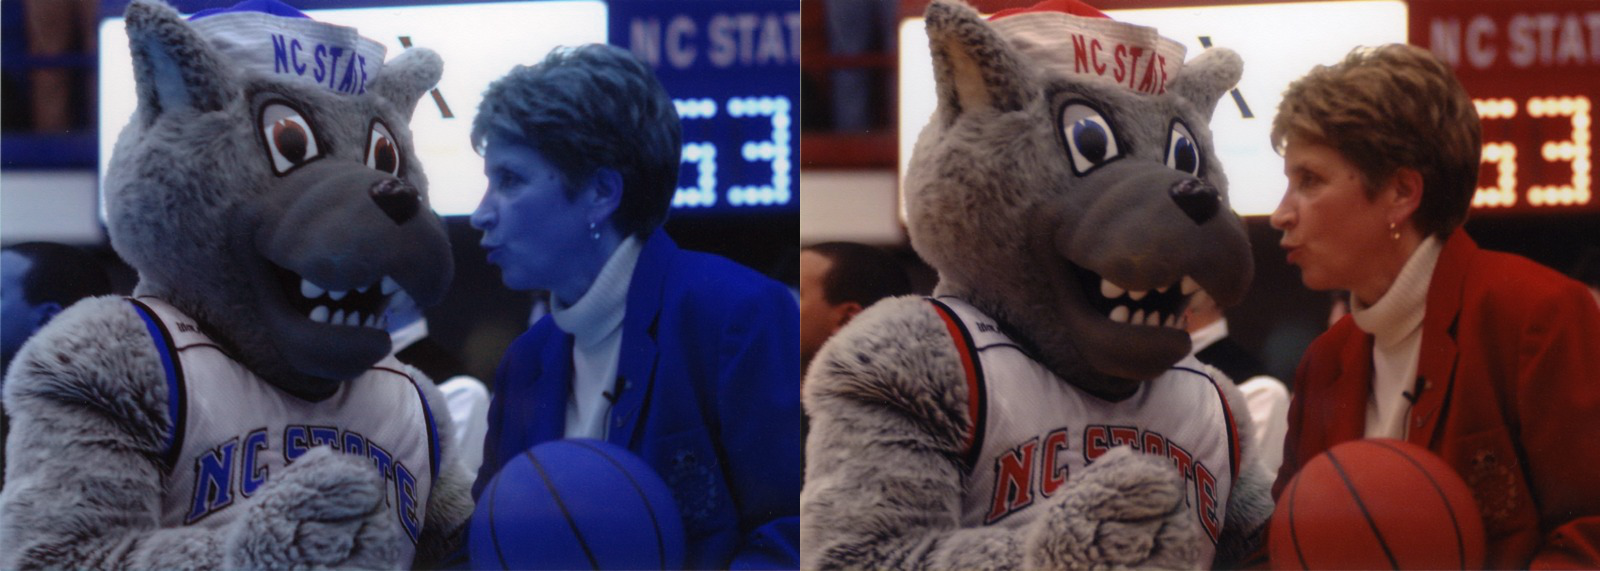

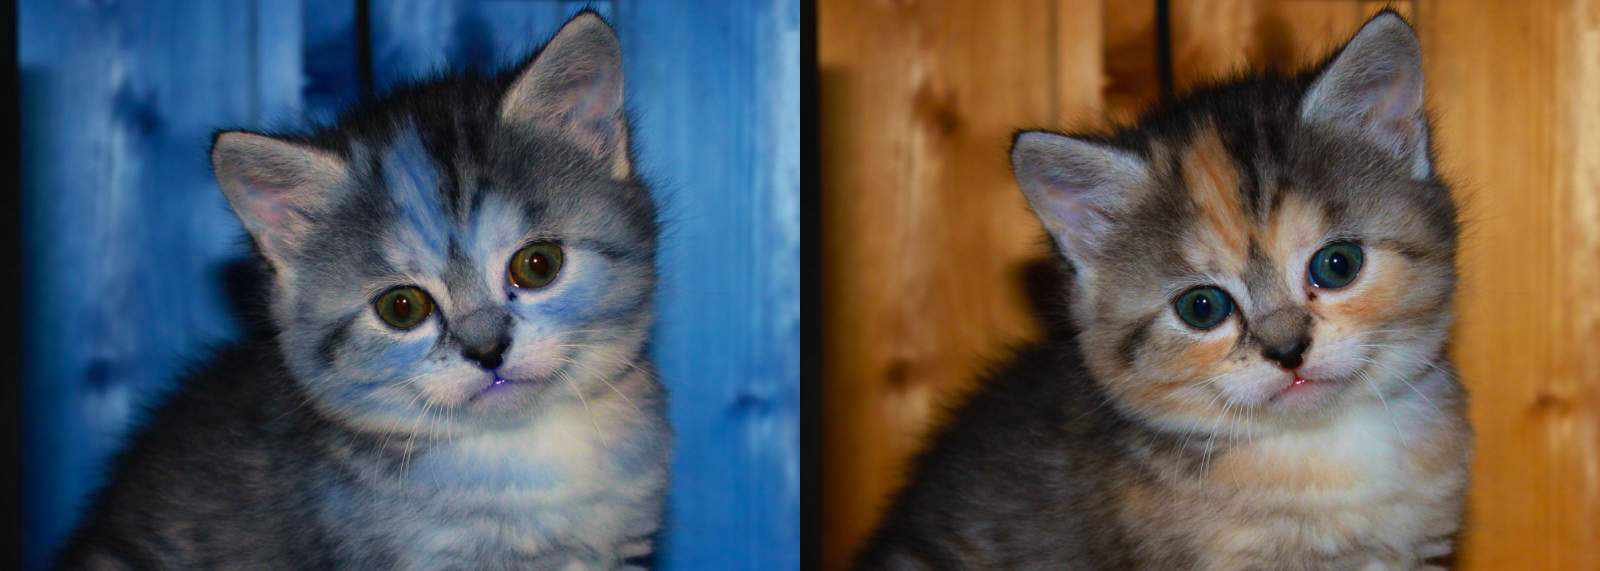

In [ ]:
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]  
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

#### TODO #1: Read an image from a URL and display it

Image source examples:

[Place Kitten](https://placekitten.com/) - use the base Place Kitten URL followed by a width and height separated by backslashes ''/''. For example, use the URL `https://placekitten.com/500/300` to fetch a cat image with a width of 500px and height of 300px.

[NC State University Libraries Special Collections](https://d.lib.ncsu.edu/collections/catalog) - browse the site to find an image thumbnail. Right-click on the thumbnail and select "Copy Image Address". The address will look like this: `https://iiif.lib.ncsu.edu/iiif/0051230/square/300,/0/default.jpg`. Replace the word "square" with the word "full" and replace "300" with "800" to access the full image at a width of 800px.

[Google Image search](https://www.google.com/imghp?hl=en) - search for an image. Left-click one of the returned images, then right-click on the full image, and then select "Copy Image Address".

In [ ]:
## Silahkan lakukan langkah seperti diatas, dengan gambar Anda sendiri dengan menghapus tanda # 
## pada kode dibawah ini dan mengisi url dari gambar yang akan Anda gunakan.

# url = 
# myImg = io.imread(url)  
# cv2_imshow(cv.cvtColor(myImg, cv.COLOR_BGR2RGB))


##Step3: Image Contours and Histograms

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

### Generate Histogram of color image and grayscale image
Terkadang Anda ingin meningkatkan kontras pada gambar atau memperluas kontras di wilayah tertentu sambil mengorbankan detail dalam warna yang tidak terlalu bervariasi, atau tidak penting. Alat yang baik untuk menemukan wilayah yang menarik adalah dengan menggunakan histogram gambar. Untuk membuat histogram dari data gambar kita, kita menggunakan fungsi matplot.pylab hist ().


Info selengkapnya: [Histogram](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html)

Display the histogram of all the pixels in the color image

In [ ]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

Menampilkan histogram dari channel R, G, B.
Kita dapat mengamati bahwa saluran hijau memiliki banyak pixel pada nilai 255 dimana nilai 255 ini  mewakili warna putih pada gambar

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [ ]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

 #### TODO # 2: DISPLAY THE GRAYSCALE OF YOUR COLOR IMAGE AND GENERATE HISTOGRAM


In [ ]:
## Silahkan lakukan langkah seperti diatas, dengan gambar Anda sendiri dengan menghapus tanda # 
## pada kode dibawah ini

#myGrayImg = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
#cv2_imshow()

### Find image contour of the grayscale image

Method 1: Use the matplotlib. contour

More Info: [matplotlib contour](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html)

In [ ]:
plt.contour(gray_image, origin = "image")

Method 2: Use the openCV lib

More info: [Contour](https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html)

In [ ]:
# Set threshold for the countour detection
ret, thresh = cv.threshold(gray_image,150,255,0)
im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image)

#### TODO # 3: Find the contour of your own image

In [ ]:
## Silahkan lakukan langkah seperti diatas, dengan gambar Anda sendiri dengan menghapus tanda # 
## pada kode dibawah ini

# plt.contour(myGrayImg)

##Step4: Grayscale Transform and Histogram Equalization


### Grayscale Transformation
Bagian ini memberikan beberapa contoh melakukan transformasi matematis pada gambar grayscale

In [ ]:
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image
cv2_imshow(im2)

In [ ]:
# Another transform of the image, after adding a constant, 
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

In [ ]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

### Histogram Equalization
This section demonstrates histogram equalization on a dark image. This transform flattens the gray-level histogram so that all intensities are as equally common as possible. The transform function is a cumulative distribution function (cdf) of the pixel values in the image (normalized to map the range of pixel values to the desired range). This example uses image 4 (im4).

In [ ]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
cv2_imshow(im5)

In [ ]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

In [ ]:
# After histogram equalization
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

## Step5: Finding Edges by Highpass Filtering in FFT

Bagian ini mendemonstrasikan melakukan high pass filter untuk menghilangkan komponen frekuensi rendah, menghasilkan gambar yang tajam yang berisi tepinya

In [ ]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()